In [1]:
import numpy as np
import pandas as pd
import pickle
%matplotlib inline

In [2]:
with open("model.pkl",'rb') as file:
    model = pickle.load(file)

In [3]:
forecast, stderr, conf = pd.Series(model.forecast(steps=12,alpha=0.05))

In [4]:
dfconf = pd.DataFrame(conf).reset_index()
dfconf.columns = ['Date', 'Upper_Value', 'Lower_Value']
dfconf['Upper_Value'] = np.exp(dfconf['Upper_Value']).apply(int)
dfconf['Lower_Value'] = np.exp(dfconf['Lower_Value']).apply(int)

In [5]:
date_dict = {0:"30-Jun-2018",
            1:"31-Jul-2018",
            2:"31-Aug-2018",
            3:"30-Sep-2018",
            4:"31-Oct-2018",
            5:"30-Nov-2018",
            6:"31-Dec-2018",
            7:"31-Jan-2019",
            8:"28-Feb-2019",
            9:"31-Mar-2019",
            10:"30-Apr-2019",
            11:"31-May-2019"}

In [6]:
dfconf.Date = dfconf.Date.map(date_dict)
dfconf.set_index('Date',inplace=True)
dfconf['Actual'] = pd.DataFrame([2877,2730,3072,3306,2836,2713,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],index=dfconf.index)
dfconf

,Upper_Value,Lower_Value,Actual
Date,,,
30-Jun-2018,2672,3184,2877.0
31-Jul-2018,2608,3112,2730.0
31-Aug-2018,2739,3268,3072.0
30-Sep-2018,2798,3341,3306.0
31-Oct-2018,2662,3179,2836.0
30-Nov-2018,2602,3110,2713.0
31-Dec-2018,2730,3263,NaN
31-Jan-2019,2786,3332,NaN
28-Feb-2019,2653,3173,NaN


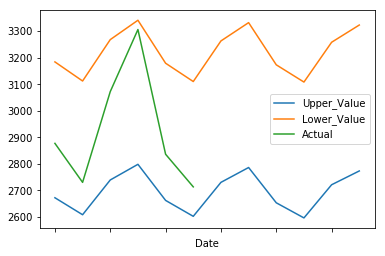

In [7]:
dfconf.plot()